## 기본 모델 만들어 예측과 평가하기
* IBM sample datasets
https://www.kaggle.com/blastchar/telco-customer-churn

* Demographic info: 
    * Gender, SeniorCitizen, Partner, Dependents
* Services subscribed: 
    * PhoneService, MultipleLine, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies
* Customer account info:
    * CustomerID, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Tenure

In [1]:
# 필요한 라이브러리 로드
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 시각화 retina 설정 
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

## 데이터 로드하기

In [3]:
df = pd.read_csv("data/telco.csv")
df.shape

(7043, 21)

In [4]:
df = df.set_index("customerID")

In [5]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

## 전처리

In [7]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [8]:
# 결측치를 채워주는 방법도 있지만 일단 제거하도록 합니다.
df = df.dropna()

In [9]:
df["Churn"].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [10]:
df["Churn_bool"] = df["Churn"] == "Yes"

## 학습, 예측 데이터셋 나누기
### 학습, 예측에 사용할 컬럼

In [11]:
feature_names = ["tenure", "MonthlyCharges", "TotalCharges"]

### 정답값이자 예측해야 될 값

In [12]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.

label_name = "Churn_bool"
label_name

'Churn_bool'

### 문제(feature)와 답안(label)을 나누기

* X, y를 만들어 줍니다.
* X는 feature, 독립변수, 예) 시험의 문제
* y는 label, 종속변수, 예) 시험의 정답

In [13]:
# X, y를 만들어 줍니다.
X = df[feature_names]
y = df[label_name]

### 학습, 예측 데이터셋 만들기
* X_train : 학습 세트 만들기, 행렬, 판다스의 데이터프레임, 2차원 리스트(배열) 구조,  예) 시험의 기출문제
* y_train : 정답 값을 만들기, 벡터, 판다스의 시리즈, 1차원 리스트(배열) 구조, 예) 기출문제의 정답
* X_test : 예측에 사용할 데이터세트를 만듭니다. 예) 실전 시험 문제
* y_test : 예측의 정답값 예) 실전 시험 문제의 정답

In [14]:
# slice 로 나누기 위해 데이터를 나눌 기준 인덱스 구하기
split_count = int(df.shape[0] * 0.8)
split_count

5625

In [15]:
# slicing으로 train, test 세트 나누기
X_train = X[:split_count]
X_test = X[split_count:]
X_train.shape, X_test.shape

((5625, 3), (1407, 3))

In [16]:
X_train.head()

,tenure,MonthlyCharges,TotalCharges
customerID,,,
7590-VHVEG,1,29.85,29.85
5575-GNVDE,34,56.95,1889.50
3668-QPYBK,2,53.85,108.15
7795-CFOCW,45,42.30,1840.75
9237-HQITU,2,70.70,151.65


In [17]:
X_test.head()

,tenure,MonthlyCharges,TotalCharges
customerID,,,
2320-JRSDE,1,19.90,19.90
2087-QAREY,22,54.70,1178.75
0601-WZHJF,14,46.35,667.70
4423-JWZJN,64,90.25,5629.15
5143-WMWOG,1,19.95,19.95


In [18]:
# 정답 데이터 나누기
y_train = y[:split_count]
y_test = y[split_count:]
y_train.shape, y_test.shape

((5625,), (1407,))

In [19]:
X_train.head(3)

,tenure,MonthlyCharges,TotalCharges
customerID,,,
7590-VHVEG,1,29.85,29.85
5575-GNVDE,34,56.95,1889.50
3668-QPYBK,2,53.85,108.15


In [20]:
X_test.head(3)

,tenure,MonthlyCharges,TotalCharges
customerID,,,
2320-JRSDE,1,19.90,19.90
2087-QAREY,22,54.70,1178.75
0601-WZHJF,14,46.35,667.70


In [21]:
y_train.head(2)

customerID
7590-VHVEG    False
5575-GNVDE    False
Name: Churn_bool, dtype: bool

## 머신러닝 모델로 예측하기

In [22]:
# 트리모델 로드하기
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
# 학습하기
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [24]:
# 예측하기
y_predict = model.predict(X_test)
y_predict

array([ True,  True, False, ...,  True,  True, False])

## 모델 평가하기

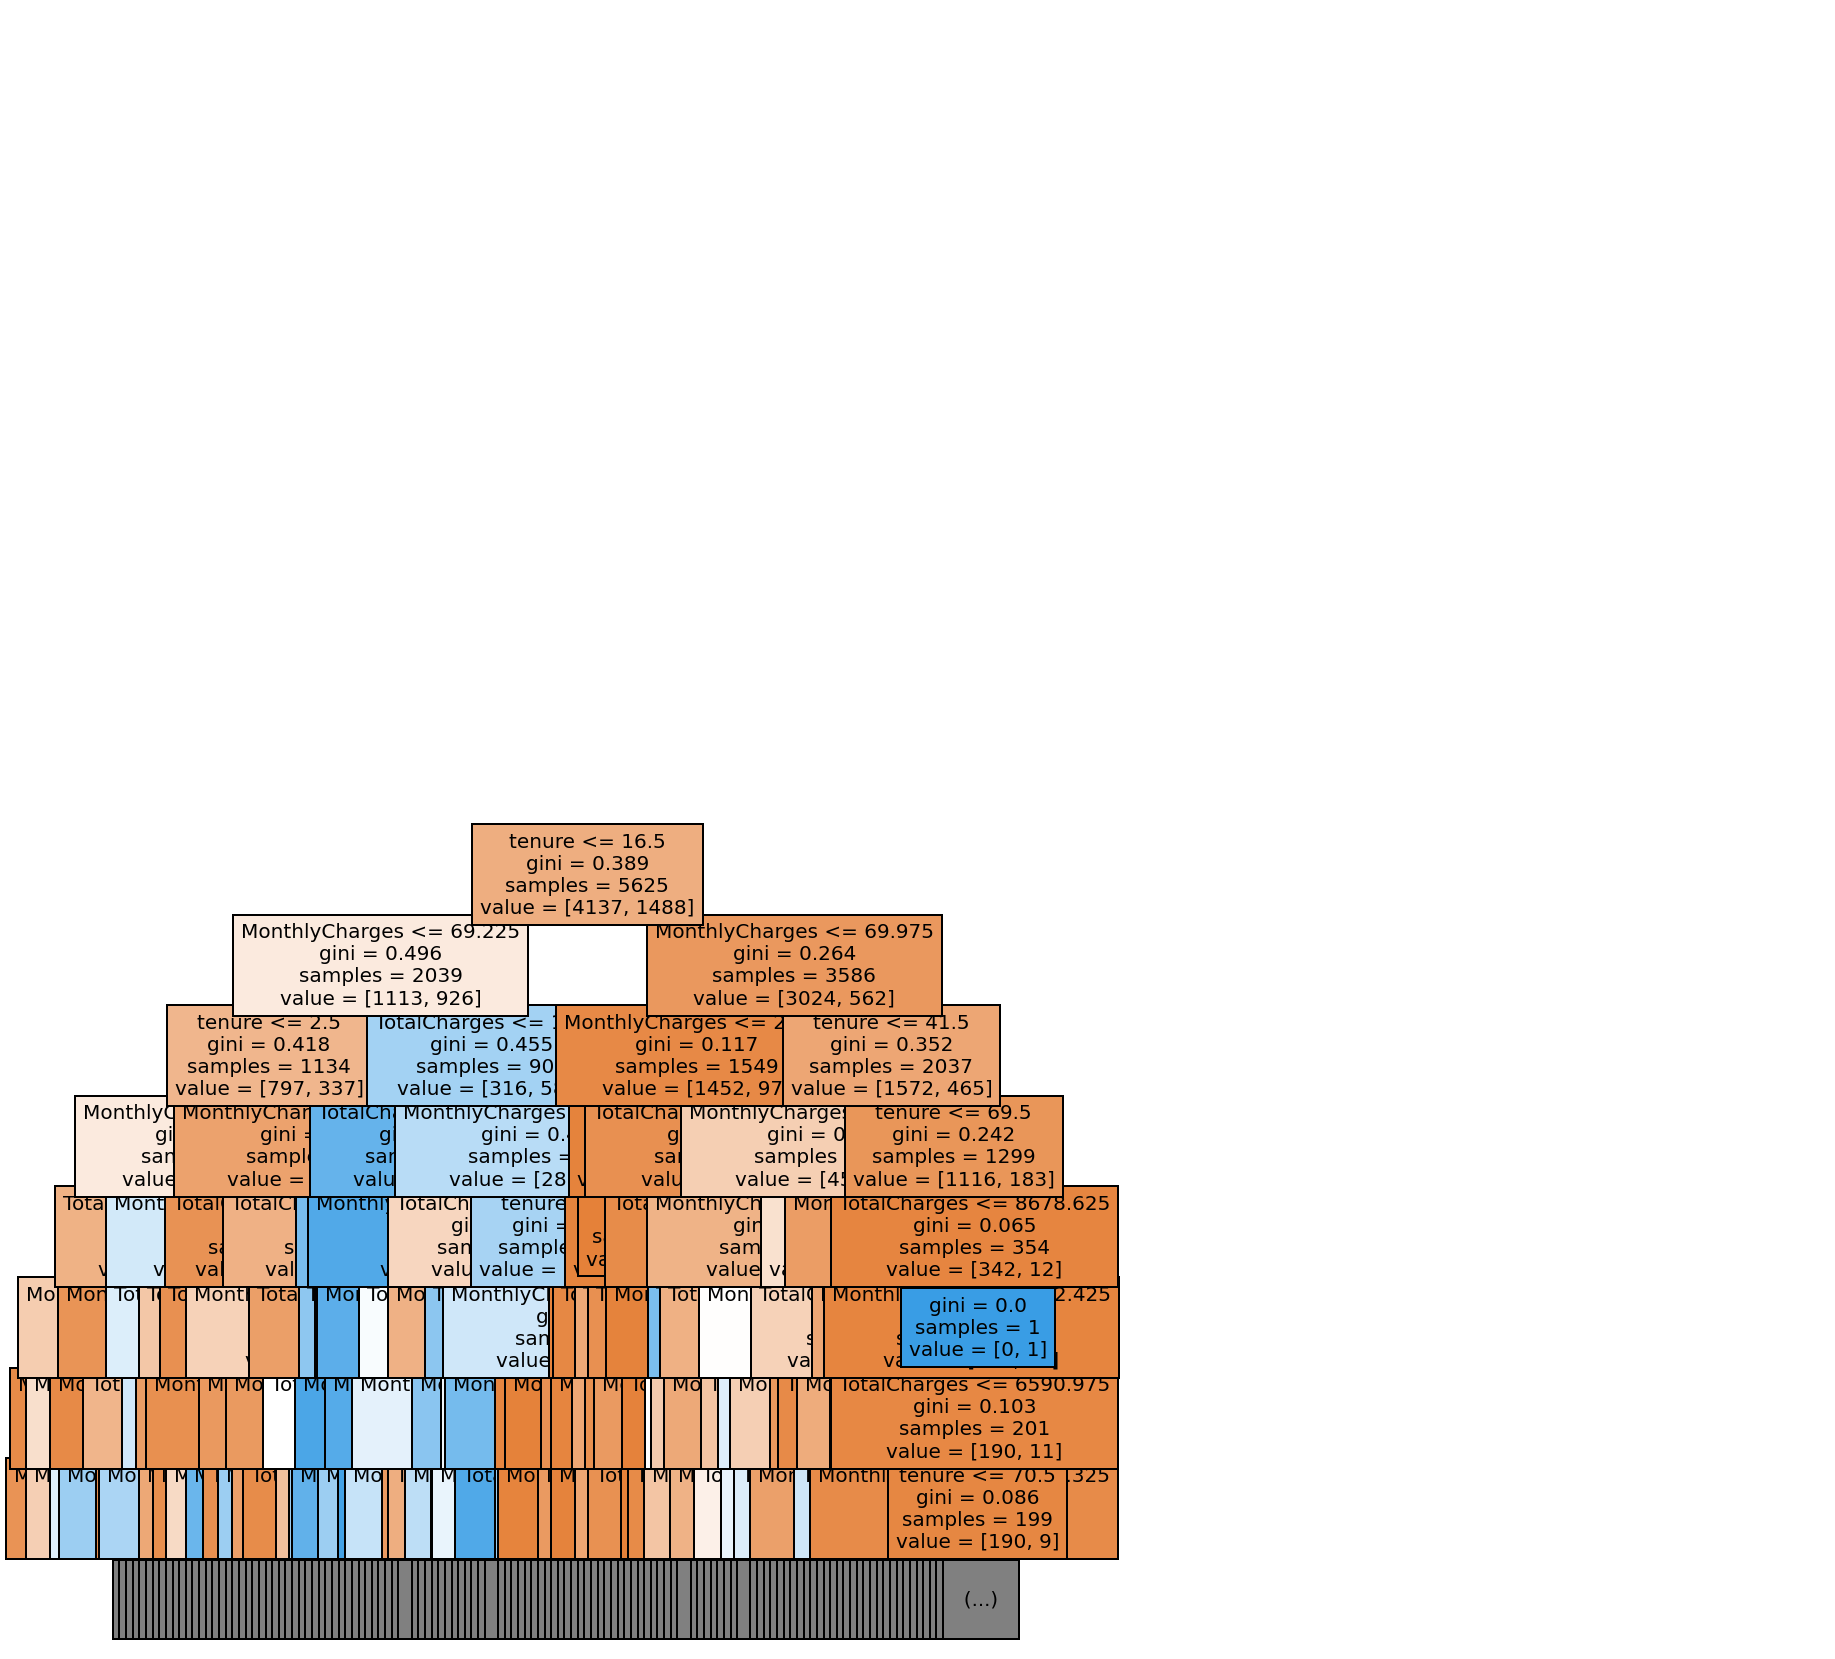

In [25]:
# plot_tree 를 통해 tree 를 그려봅니다.
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 15))
tree = plot_tree(model,
                 feature_names=feature_names,
                 max_depth=7,
                 filled=True,
                 fontsize=10)

In [26]:
# export_text 를 통해 text 로 트리를 그립니다.
# 너무길면 보기가 어렵기 때문에 max_depth 를 설정해 주면 특정 깊이까지만 보입니다.
from sklearn.tree import export_text
tree_text = export_text(model, feature_names=feature_names, max_depth=3)
print(tree_text)

|--- tenure <= 16.50
|   |--- MonthlyCharges <= 69.22
|   |   |--- tenure <= 2.50
|   |   |   |--- MonthlyCharges <= 20.85
|   |   |   |   |--- truncated branch of depth 11
|   |   |   |--- MonthlyCharges >  20.85
|   |   |   |   |--- truncated branch of depth 21
|   |   |--- tenure >  2.50
|   |   |   |--- MonthlyCharges <= 27.43
|   |   |   |   |--- truncated branch of depth 21
|   |   |   |--- MonthlyCharges >  27.43
|   |   |   |   |--- truncated branch of depth 28
|   |--- MonthlyCharges >  69.22
|   |   |--- TotalCharges <= 118.10
|   |   |   |--- TotalCharges <= 75.68
|   |   |   |   |--- truncated branch of depth 18
|   |   |   |--- TotalCharges >  75.68
|   |   |   |   |--- truncated branch of depth 9
|   |   |--- TotalCharges >  118.10
|   |   |   |--- MonthlyCharges <= 73.53
|   |   |   |   |--- truncated branch of depth 11
|   |   |   |--- MonthlyCharges >  73.53
|   |   |   |   |--- truncated branch of depth 23
|--- tenure >  16.50
|   |--- MonthlyCharges <= 69.97
|   |   

In [27]:
# feature_importances_ 를 통해 모델의 피처 중요도를 추출하기

model.feature_importances_

array([0.23366178, 0.41575294, 0.35058528])

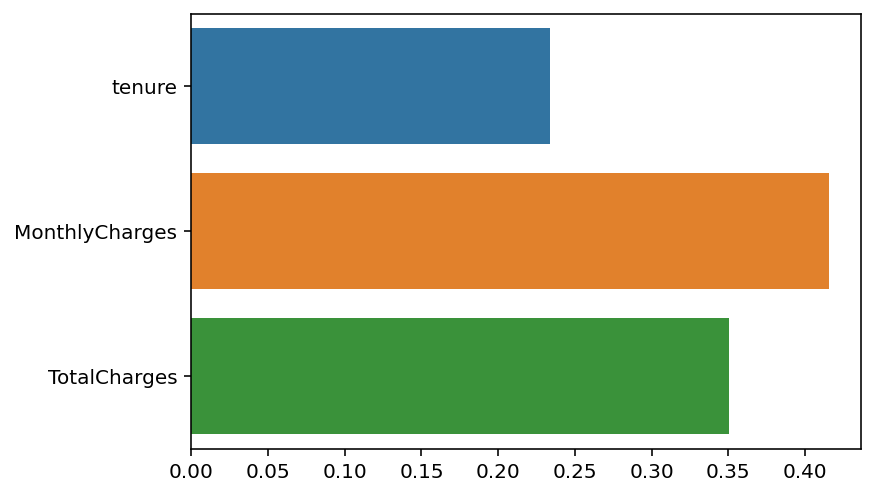

In [28]:
# 피처의 중요도 시각화 하기

sns.barplot(x=model.feature_importances_, y=feature_names)

### 점수 측정하기
#### Accuracy

In [29]:
# 모델이 얼마나 잘 예측했는지 측정해 봅니다.
# 시험을 보고 나서 몇 개 맞았는지 틀렸는지 채점해 보는 과정과 유사하다고 보면 됩니다.
# 실전 문제에서는 답이 없어서 우리가 예측을 해야겠지만 
# 이 실습은 정답이 있는 모의고사 입니다. 
# 모의고사를 보면 내 실력이 어느정도 되는지 예측해 볼 수 있듯이 점수를 측정해 봅니다.
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.7199715707178393

In [30]:
# 정답과 같이 예측한 값은 True 로 나오게 됩니다. 
# True == 1 이기 때문에 평균값을 내면 정답을 맞춘 비율을 구할 수 있습니다.
(y_test == y_predict).mean()

0.7199715707178393

#### F1 score
* precision 과 recall의 조화평균
* [정밀도와 재현율 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%A0%95%EB%B0%80%EB%8F%84%EC%99%80_%EC%9E%AC%ED%98%84%EC%9C%A8)

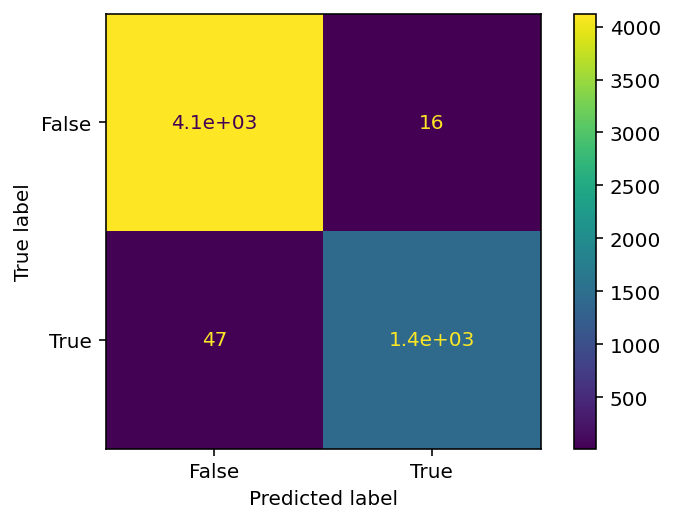

In [31]:
# plot_confusion_matrix 를 그립니다.
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_train, y_train)

In [32]:
# 하지만 암환자를 예측한다든지 코로나 양성여부를 판단한다든지 할때는 
# 1000명 검사자 중에 한 두 명만 양성일 수도 있습니다. 
# 이럴 때 1명의 양성은 찾지 못했지만 다른 사람들이 음성인 것을 맞게 예측했다면 정확한 모델이 아님에도 정확도가 높게 나옵니다.
from sklearn.metrics import classification_report

report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

       False       0.80      0.81      0.81      1026
        True       0.48      0.47      0.47       381

    accuracy                           0.72      1407
   macro avg       0.64      0.64      0.64      1407
weighted avg       0.72      0.72      0.72      1407



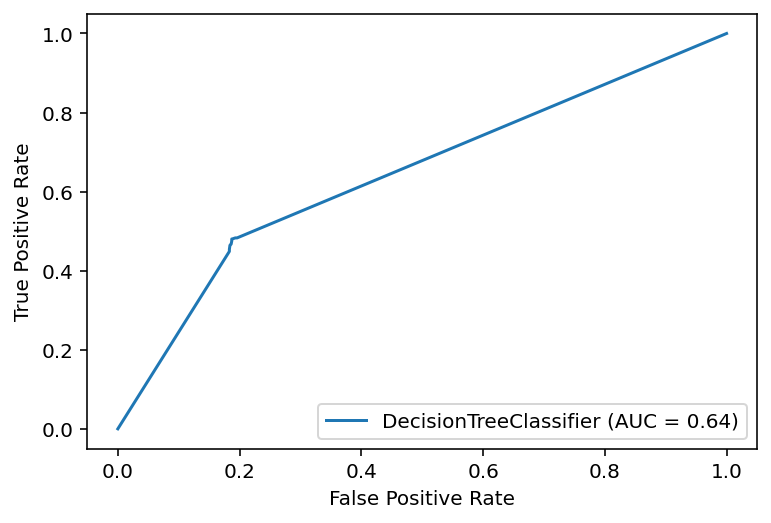

In [33]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model, X_test, y_test)